In [145]:
# Bagging classifier with Random Forest

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator__max_depth': [2, 4, 6, 8],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 1.0]
}

rf = RandomForestClassifier(max_depth=4)
bagged_rf = BaggingClassifier(base_estimator=rf, random_state=42)
grid_search = GridSearchCV(bagged_rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8],
                         'max_samples': [0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [146]:
print("Best parameters:", grid_search.best_params_)
print("Training accuracy:", grid_search.best_score_)
print("Test accuracy:", grid_search.score(X_test, y_test))

Best parameters: {'base_estimator__max_depth': 8, 'max_samples': 1.0, 'n_estimators': 200}
Training accuracy: 0.8236001783785962
Test accuracy: 0.8335444641499873


In [147]:
# SVC

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

# Construct the SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42, probability=True)

# Train the classifier on the training data
svm_linear.fit(X_train, y_train)

# Test the classifier on the test data
svm_linear_pred = svm_linear.predict(X_test)
svm_linear_pred_proba = svm_linear.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_linear_acc = accuracy_score(y_test, svm_linear_pred)
#svm_linear_f1 = f1_score(y_test, svm_linear_pred)
#svm_linear_auc = roc_auc_score(y_test, svm_linear_pred_proba)

print("SVM Classifier with Linear Kernel:")
print("Accuracy: {:.4f}".format(svm_linear_acc))
#print("F1 Score: {:.4f}".format(svm_linear_f1))
#print("AUC Score: {:.4f}".format(svm_linear_auc))

SVM Classifier with Linear Kernel:
Accuracy: 0.7603


In [148]:
# Construct the SVM classifier with an RBF kernel

svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)

# Train the classifier on the training data
svm_rbf.fit(X_train, y_train)

# Test the classifier on the test data
svm_rbf_pred = svm_rbf.predict(X_test)
svm_rbf_pred_proba = svm_rbf.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_rbf_acc = accuracy_score(y_test, svm_rbf_pred)
#svm_rbf_f1 = f1_score(y_test, svm_rbf_pred)
#svm_rbf_auc = roc_auc_score(y_test, svm_rbf_pred_proba)

print("SVM Classifier with RBF Kernel:")
print("Accuracy: {:.4f}".format(svm_rbf_acc))
#print("F1 Score: {:.4f}".format(svm_rbf_f1))
#print("AUC Score: {:.4f}".format(svm_rbf_auc))


SVM Classifier with RBF Kernel:
Accuracy: 0.8330


In [149]:
# Construct the SVM classifier with a polynomial kernel
svm_poly = SVC(kernel='poly', random_state=42, probability=True)

# Train the classifier on the training data
svm_poly.fit(X_train, y_train)

# Test the classifier on the test data
svm_poly_pred = svm_poly.predict(X_test)
svm_poly_pred_proba = svm_poly.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_poly_acc = accuracy_score(y_test, svm_poly_pred)
#svm_poly_f1 = f1_score(y_test, svm_poly_pred)
#svm_poly_auc = roc_auc_score(y_test, svm_poly_pred_proba)

print("SVM Classifier with Polynomial Kernel:")
print("Accuracy: {:.4f}".format(svm_poly_acc))
#print("F1 Score: {:.4f}".format(svm_poly_f1))
#print("AUC Score: {:.4f}".format(svm_poly_auc))

SVM Classifier with Polynomial Kernel:
Accuracy: 0.7963


In [150]:
# Construct the SVM classifier with a sigmoid kernel
svm_sig = SVC(kernel='sigmoid', random_state=42, probability=True)

# Train the classifier on the training data
svm_sig.fit(X_train, y_train)

# Test the classifier on the test data
svm_sig_pred = svm_sig.predict(X_test)
svm_sig_pred_proba = svm_sig.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_sig_acc = accuracy_score(y_test, svm_sig_pred)
#svm_sig_f1 = f1_score(y_test, svm_sig_pred)
#svm_sig_auc = roc_auc_score(y_test, svm_sig_pred_proba)

print("SVM Classifier with Sigmoid Kernel:")
print("Accuracy: {:.4f}".format(svm_sig_acc))
#print("F1 Score: {:.4f}".format(svm_sig_f1))
#print("AUC Score: {:.4f}".format(svm_sig_auc))

SVM Classifier with Sigmoid Kernel:
Accuracy: 0.5825


In [151]:
# Importing 'GridSearchCV' from 'sklearn'
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Specifying the hyperparameters 'C', 'gamma', and 'kernel'

param_grid = {'C': [0.01, 0.1, 1, 10, 100],   
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'ploy', 'sigmoid']}

# Instantiating 'GridSearchCV'
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 

# Fitting the data
grid.fit(X_train, y_train)

print('\n Best choices for hyperparameters:\n', grid.best_params_) # Presenting best choice

grid_predictions = grid.predict(X_test)  # Compute the predictions of SVM with best choice of hyperparameters

print('\n Test Classification Report:\n\n', classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits

 Best choices for hyperparameters:
 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

 Test Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.91      0.89      2127
           1       0.89      0.85      0.87      1820

    accuracy                           0.88      3947
   macro avg       0.88      0.88      0.88      3947
weighted avg       0.88      0.88      0.88      3947



This code performs hyperparameter tuning for an SVM classifier using GridSearchCV.

The grid is then fit to the training data using the fit method, and the best hyperparameters are obtained using the best_params_ attribute of the GridSearchCV object. Finally, the grid is used to make predictions on the test data, and a classification report is printed using the classification_report function from sklearn.metrics.

In [152]:
# Construct the SVM classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', C = 100, gamma ='auto', random_state=42, probability=True)

# Train the classifier on the training data
svm_rbf.fit(X_train, y_train)

# Test the classifier on the test data
svm_rbf_pred = svm_rbf.predict(X_test)
svm_rbf_pred_proba = svm_rbf.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_rbf_acc = accuracy_score(y_test, svm_rbf_pred)

print("SVM Classifier with RBF Kernel:")
print("Accuracy: {:.4f}".format(svm_rbf_acc))

test_prob_svm_rbf = svm_rbf.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_svm_rbf.tolist())

SVM Classifier with RBF Kernel:
Accuracy: 0.8809


In [153]:
from sklearn.metrics import classification_report

# Print classification report for training set
svm_rbf_train_pred = svm_rbf.predict(X_train)
svm_rbf_train_acc = accuracy_score(y_train, svm_rbf_train_pred)
svm_rbf_train_report = classification_report(y_train, svm_rbf_train_pred)
print("SVM Classifier with RBF Kernel - Training Set:")
print("Accuracy: {:.4f}".format(svm_rbf_train_acc))
print(svm_rbf_train_report)

# Print classification report for test set
svm_rbf_test_report = classification_report(y_test, svm_rbf_pred)
print("SVM Classifier with RBF Kernel - Test Set:")
print("Accuracy: {:.4f}".format(svm_rbf_acc))
print(svm_rbf_test_report)


SVM Classifier with RBF Kernel - Training Set:
Accuracy: 0.9134
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      8617
           1       0.92      0.88      0.90      7171

    accuracy                           0.91     15788
   macro avg       0.91      0.91      0.91     15788
weighted avg       0.91      0.91      0.91     15788

SVM Classifier with RBF Kernel - Test Set:
Accuracy: 0.8809
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2127
           1       0.89      0.85      0.87      1820

    accuracy                           0.88      3947
   macro avg       0.88      0.88      0.88      3947
weighted avg       0.88      0.88      0.88      3947



In [154]:
# Gradient Boosting Classifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# create gradient boosting classifier
gb = GradientBoostingClassifier()

# define hyperparameter space to search over
param_dist = {'n_estimators': np.arange(50, 300, 50),
              'learning_rate': np.logspace(-3, 0, 4),
              'max_depth': np.arange(3, 8),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 5)}

# create randomized search object with cross-validation
random_search = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1)

# fit the randomized search object on the training data
random_search.fit(X_train, y_train)

# print the best hyperparameters found by the randomized search
print("Best Hyperparameters:")
print(random_search.best_params_)

Best Hyperparameters:
{'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}


In [155]:
# Gradient Boosting Classifier with hyperparameter tuning

from sklearn.ensemble import GradientBoostingClassifier

# create gradient boosting classifier with adjusted hyperparameters
gb = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=7, 
                                min_samples_split=2, min_samples_leaf=1)

# fit the classifier on the training data
gb.fit(X_train, y_train)

# make predictions on the training and testing sets
y_train_pred = gb.predict(X_train)
y_pred = gb.predict(X_test)

# calculate accuracy scores for the training and testing sets
acc_gb_train = accuracy_score(y_train, y_train_pred)
acc_gb = accuracy_score(y_test, y_pred)

# print the accuracy scores
print('Gradient Boosting of Training Set: {:.2f}%'.format(acc_gb_train*100))
print('Gradient Boosting of Testing Set: {:.2f}%'.format(acc_gb*100))
print('\n')

# print classification reports for the training and testing sets
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training set:")
print(report_train)
print('\n')
print("Classification report of testing set:")
print(report_test)

test_prob_gb = gb.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_gb.tolist())

Gradient Boosting of Training Set: 98.47%
Gradient Boosting of Testing Set: 89.18%


Classification report of training set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8617
           1       0.99      0.98      0.98      7171

    accuracy                           0.98     15788
   macro avg       0.99      0.98      0.98     15788
weighted avg       0.98      0.98      0.98     15788



Classification report of testing set:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2127
           1       0.89      0.88      0.88      1820

    accuracy                           0.89      3947
   macro avg       0.89      0.89      0.89      3947
weighted avg       0.89      0.89      0.89      3947



In [156]:
# Finding hyperparameters for Extreme Gradient Boosting

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for the XGBoost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Create the grid search object
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score:  0.8815557093086867


In [160]:
# Extreme Gradient Boosting with hyperparameters

import xgboost as xgb
from sklearn.metrics import classification_report

# Define the hyperparameters
params = {'learning_rate': 0.08, 'max_depth': 7, 'n_estimators': 300}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(**params)

# Train the model on your training data
xgb_model.fit(X_train, y_train)

# Predict on train set
train_pred = xgb_model.predict(X_train)
print('Classification Report for Train Set:\n', classification_report(y_train, train_pred))

# Predict on test set
test_pred = xgb_model.predict(X_test)
print('Classification Report for Test Set:\n', classification_report(y_test, test_pred))

test_prob_xgb_model = xgb_model.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_xgb_model.tolist())

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8617
           1       0.97      0.95      0.96      7171

    accuracy                           0.97     15788
   macro avg       0.97      0.96      0.96     15788
weighted avg       0.97      0.97      0.97     15788

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2127
           1       0.89      0.87      0.88      1820

    accuracy                           0.89      3947
   macro avg       0.89      0.89      0.89      3947
weighted avg       0.89      0.89      0.89      3947



## Summary Till Now

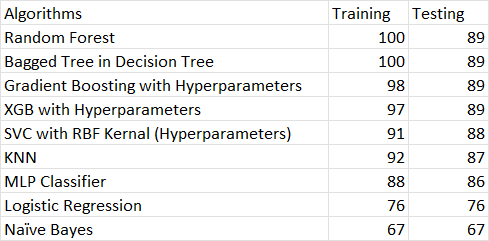

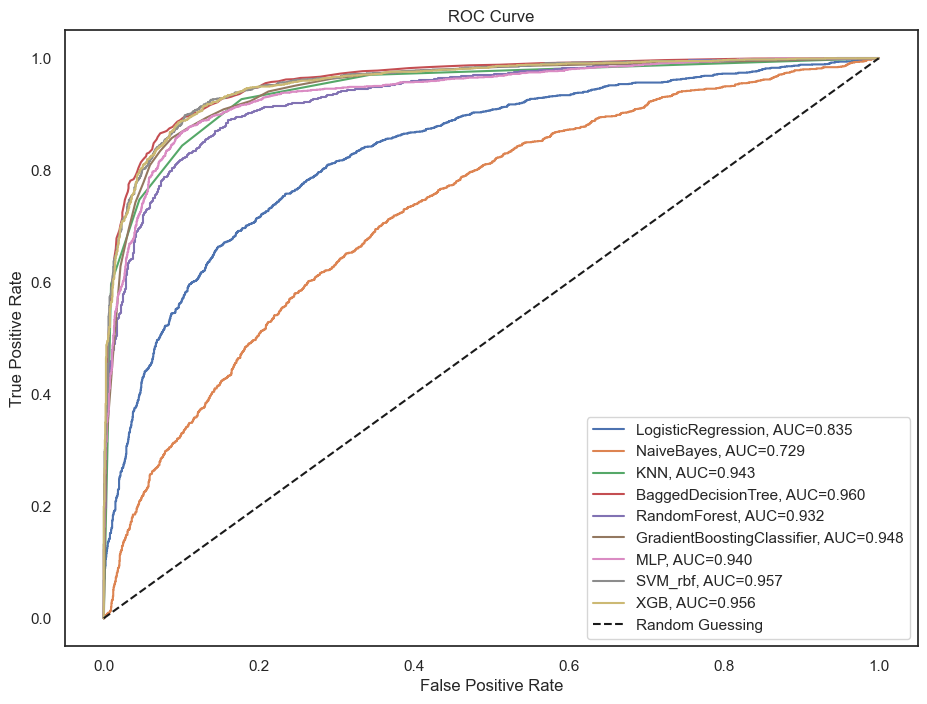

In [158]:
# Plotting ROC Curve

models = ['LogisticRegression', 'NaiveBayes', 'KNN', 'BaggedDecisionTree', 'RandomForest', 'GradientBoostingClassifier', 'MLP','SVM_rbf', 'XGB']


scores_dict1 = dict(zip(models, y_scores_list1))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Plot ROC curves and AUC scores for all models in scores_dict1
plt.figure(figsize=(11, 8))
for model_name, y_scores in scores_dict1.items():
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name}, AUC={auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [159]:
sorted_models = sorted(scores_dict1.items(), key=lambda x: roc_auc_score(y_test, x[1]), reverse=True)

# Select top 3 models
top_models = [model_name for model_name, _ in sorted_models[:3]]

print('Top 3 Models based on AUC score:', top_models)

Top 3 Models based on AUC score: ['BaggedDecisionTree', 'SVM_rbf', 'XGB']


## Top 3 Models based on AUC score: 

- RandomForest 
- GradientBoostingClassifier
- Extreme Gradient Boosting